***Importing Libraries***


In [ ]:
import os
import cv2
import numpy as np
import torch
import albumentations as A
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
import cv2
import numpy as np
from PIL import Image
import os

# def grabcut_tongue_segmentation(image_path, save_mask_path, save_crop_path):
#     img = cv2.imread(image_path)
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     mask = np.zeros(img.shape[:2], np.uint8)

#     # Automatically define center region as foreground
#     h, w = img.shape[:2]
#     rect = (int(w*0.2), int(h*0.2), int(w*0.6), int(h*0.6))  # bounding box around center

#     # Temporary arrays
#     bgdModel = np.zeros((1, 65), np.float64)
#     fgdModel = np.zeros((1, 65), np.float64)

#     # Apply GrabCut
#     cv2.grabCut(img_rgb, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

#     # Convert result into binary mask
#     binary_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8)

#     # Save mask
#     mask_img = Image.fromarray((binary_mask * 255).astype(np.uint8))
#     mask_img.save(save_mask_path)

#     # Apply mask to get cropped tongue
#     tongue_img = img_rgb * binary_mask[:, :, np.newaxis]
#     tongue_crop = Image.fromarray(tongue_img)
    tongue_crop.save(save_crop_path)


In [3]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Load image
# img = cv2.imread('/kaggle/working/masks/128_jpg.rf.876bce66e41f91460e02e458d662cf73.jpg')
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# h, w = img_rgb.shape[:2]

# # Initialize mask and models
# mask = np.full((h, w), cv2.GC_PR_BGD, dtype=np.uint8)  # probable background
# bgdModel = np.zeros((1, 65), np.float64)
# fgdModel = np.zeros((1, 65), np.float64)

# # Manually mark tongue region (approximate box) as sure foreground
# # Adjust the box if needed based on visual inspection
# mask[120:360, 80:320] = cv2.GC_FGD  # definite foreground

# # Manually mark colorbar as sure background
# mask[300:450, 370:450] = cv2.GC_BGD  # definite background

# # Run GrabCut with manual mask
# cv2.grabCut(img_rgb, mask, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)

# # Extract the final mask
# mask2 = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 1, 0).astype('uint8')
# result = img_rgb * mask2[:, :, np.newaxis]

# # Optional: set background to black
# final = np.zeros_like(img_rgb)
# final[mask2 == 1] = img_rgb[mask2 == 1]

# # Show
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.imshow(img_rgb)
# plt.title("Original Image")
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(final)
# plt.title("Tongue Segmented (Colorbar Removed)")
# plt.axis('off')

# plt.tight_layout()
# plt.show()


[ WARN:0@33.323] global loadsave.cpp:268 findDecoder imread_('/kaggle/working/masks/128_jpg.rf.876bce66e41f91460e02e458d662cf73.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [4]:
# import os
# import cv2
# import torch
# import numpy as np
# import matplotlib.pyplot as plt
# from segment_anything import sam_model_registry, SamPredictor

# augment = A.Compose([
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.3),
#     A.Rotate(limit=10, p=0.5),
#     A.GaussianBlur(blur_limit=(3, 5), p=0.3),
#     A.Resize(512, 512),
# ])

# sam_checkpoint = "/kaggle/input/sam-vit-h-nl/sam_vit_h_4b8939.pth"
# model_type = "vit_h"
# device = "cuda" if torch.cuda.is_available() else "cpu"
# sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
# sam.to(device=device)
# predictor = SamPredictor(sam)

# def segmentation_sam(image_path, mask_output_path, crop_output_path):
#     image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     augmented = augment(image=image_rgb)['image']
#     predictor.set_image(augmented)

#     input_point = np.array([[image.shape[1] // 2, image.shape[0] // 2]])  # Center point
#     input_label = np.array([1])

#     masks, scores, logits = predictor.predict(
#         point_coords=input_point,
#         point_labels=input_label,
#         multimask_output=True,
#     )

#     best_mask = masks[np.argmax(scores)]
#     mask_uint8 = (best_mask * 255).astype(np.uint8)
#     kernel = np.ones((5, 5), np.uint8)
#     cleaned_mask = cv2.morphologyEx(mask_uint8, cv2.MORPH_CLOSE, kernel)

#     # Save cleaned mask
#     cv2.imwrite(mask_output_path, cleaned_mask)

#     binary_mask = (cleaned_mask > 127).astype(np.uint8)
#     segmented_tongue = cv2.bitwise_and(image, image, mask=binary_mask)

#     # Save segmented tongue region
#     segmented_tongue_bgr = cv2.cvtColor(segmented_tongue, cv2.COLOR_RGB2BGR)
#     cv2.imwrite(crop_output_path, segmented_tongue_bgr)


# segmentation_sam()
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 3, 1)
# plt.imshow(image_rgb)
# plt.title("Original")
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.imshow(augmented)
# plt.title("Augmented")
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.imshow(segmented_tongue)
# plt.title("Segmented Tongue")
# plt.axis('off')

# plt.tight_layout()
# plt.show()


/tmp/ipykernel_162/3940413914.py:12: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),


TypeError: segmentation_sam() missing 3 required positional arguments: 'image_path', 'mask_output_path', and 'crop_output_path'

/usr/local/lib/python3.11/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


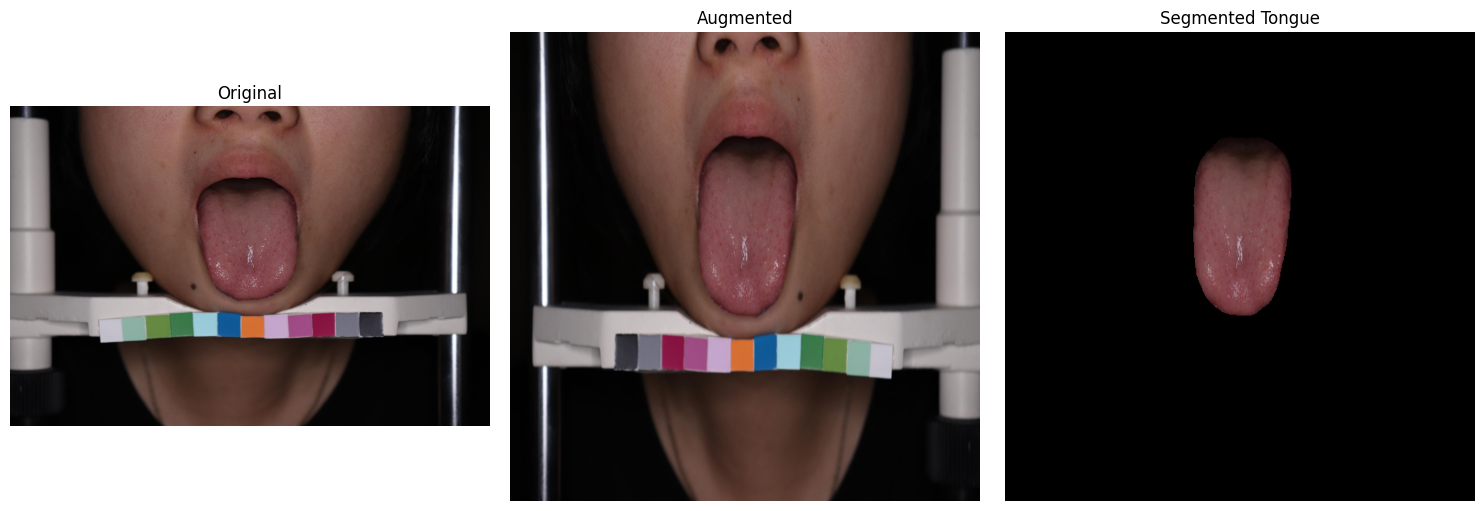

In [3]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from segment_anything import sam_model_registry, SamPredictor

# Augmentations
augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.Rotate(limit=10, p=0.5),
    A.GaussianBlur(blur_limit=(3, 5), p=0.3),
    A.Resize(512, 512),
])

# Load SAM model
sam_checkpoint = "/kaggle/input/sam-vit-h-nl/sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

# Function
def segmentation_sam(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    augmented = augment(image=image_rgb)['image']
    predictor.set_image(augmented)

    input_point = np.array([[augmented.shape[1] // 2, augmented.shape[0] // 2]])
    input_label = np.array([1])

    masks, scores, _ = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )

    best_mask = masks[np.argmax(scores)]
    mask_uint8 = (best_mask * 255).astype(np.uint8)
    kernel = np.ones((5, 5), np.uint8)
    cleaned_mask = cv2.morphologyEx(mask_uint8, cv2.MORPH_CLOSE, kernel)

    binary_mask = (cleaned_mask > 127).astype(np.uint8)
    segmented_tongue = cv2.bitwise_and(augmented, augmented, mask=binary_mask)

    return image_rgb, augmented, segmented_tongue

# Example image path
image_path = "/kaggle/input/tonguedataset/tongue_dataset/tongue_dataset/train/images/113_jpg.rf.7814968b05bd8520afb861ae1bb6306e.jpg"

# Call function
image_rgb, augmented, segmented_tongue = segmentation_sam(image_path)

# Plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(augmented)
plt.title("Augmented")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented_tongue)
plt.title("Segmented Tongue")
plt.axis('off')

plt.tight_layout()
plt.show()


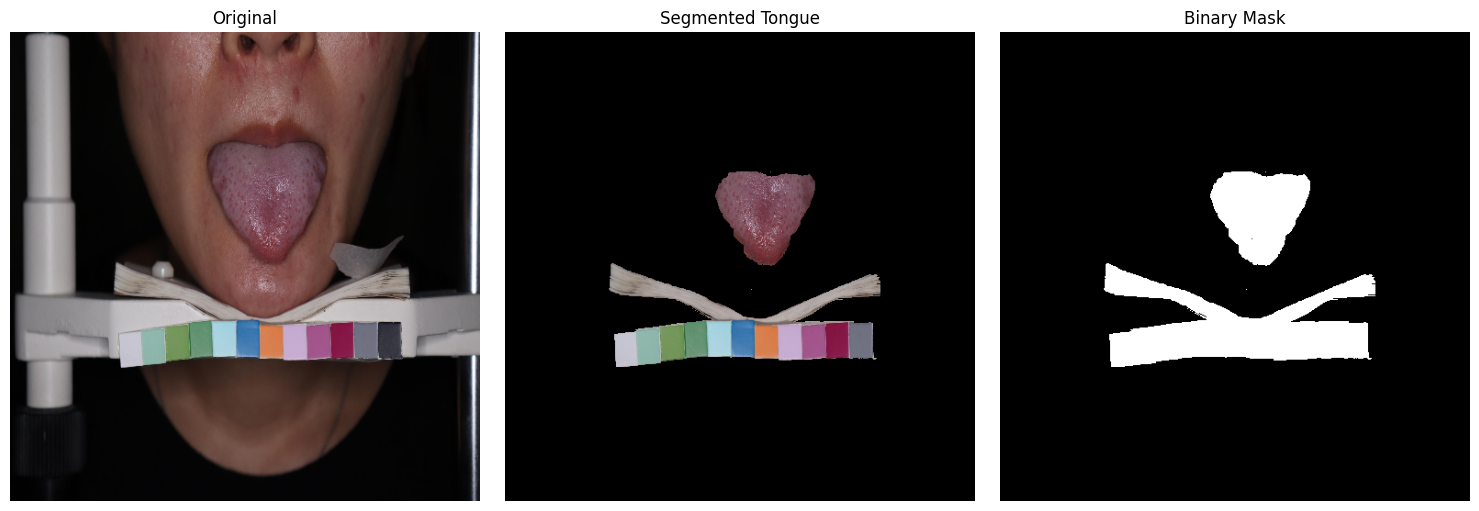

In [6]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def segment_tongue_grabcut(image_path):
#     image = cv2.imread(image_path)
#     image = cv2.resize(image, (512, 512))
#     mask = np.zeros(image.shape[:2], np.uint8)

#     # Define a rectangle around the center (assume tongue is roughly centered)
#     height, width = image.shape[:2]
#     rect = (int(width*0.2), int(height*0.3), int(width*0.6), int(height*0.5))

#     bgdModel = np.zeros((1, 65), np.float64)
#     fgdModel = np.zeros((1, 65), np.float64)

#     cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

#     # Where mask==2 or mask==0, it is background
#     mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
#     segmented = image * mask2[:, :, np.newaxis]

#     return image, segmented, mask2 * 255

# # Example usage
# image_path = "/kaggle/input/tonguedataset/tongue_dataset/tongue_dataset/train/images/226_jpg.rf.48eda46badd94d630c6675c10f0c4018.jpg"
# original, segmented, mask = segment_tongue_grabcut(image_path)

# # Show results
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 3, 1)
# plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
# plt.title("Original")
# plt.axis("off")

# plt.subplot(1, 3, 2)
# plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
# plt.title("Segmented Tongue")
# plt.axis("off")

# plt.subplot(1, 3, 3)
# plt.imshow(mask, cmap='gray')
# plt.title("Binary Mask")
# plt.axis("off")

# plt.tight_layout()
# plt.show()


In [27]:
image_dir = "/kaggle/input/tonguedataset/tongue_dataset/tongue_dataset/train/images"
output_mask_dir = "new_segemented/"
output_crop_dir = "new_tongue_only/"

os.makedirs(output_mask_dir, exist_ok=True)
os.makedirs(output_crop_dir, exist_ok=True)

valid_ext = ('.jpg', '.jpeg', '.png') 

for fname in os.listdir(image_dir):
    if fname.lower().endswith(valid_ext):
        try:
            in_path = os.path.join(image_dir, fname)
            mask_path = os.path.join(output_mask_dir, fname)
            crop_path = os.path.join(output_crop_dir, fname)
            segmentation_sam(in_path, mask_path, crop_path)  # ✅ Your function call
        except Exception as e:
            print(f"Failed on {fname}: {e}")

Failed on 275_jpg.rf.202a2ee187e12560a1d59fcc36ea2df1.jpg: segmentation_sam() takes 1 positional argument but 3 were given
Failed on 258_jpg.rf.de84a8fd2e4a6dea3f32be182131b156.jpg: segmentation_sam() takes 1 positional argument but 3 were given
Failed on 130_jpg.rf.5fca8f48014a15d24623ef8f151f36b1.jpg: segmentation_sam() takes 1 positional argument but 3 were given
Failed on BT23_jpg.rf.5be5fc91fc5f3a0a7b92a70b5cad5c24.jpg: segmentation_sam() takes 1 positional argument but 3 were given
Failed on 403_jpg.rf.e27463cbaa5b51900f1ddfe4b6641024.jpg: segmentation_sam() takes 1 positional argument but 3 were given
Failed on 254_jpg.rf.69a8e1a32948d8e6657c5735ce84133b.jpg: segmentation_sam() takes 1 positional argument but 3 were given
Failed on 350_jpg.rf.b76a2108ab18b4a7a465483deebf0619.jpg: segmentation_sam() takes 1 positional argument but 3 were given
Failed on 24_jpg.rf.629fb22e017f4f5272d0f909f6712bb8.jpg: segmentation_sam() takes 1 positional argument but 3 were given
Failed on 327_jp

In [ ]:
---------------------------------------------

In [3]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

# ----------------- Configs -------------------
sam_checkpoint = "/kaggle/input/sam-vit-h-nl/sam_vit_h_4b8939.pth"
model_type = "vit_h"
image_path = "/kaggle/input/tonguedataset/tongue_dataset/tongue_dataset/train/images/35_jpg.rf.591b9662e616a98e8ca687896017b838.jpg"

# ----------------- Load Image ----------------
image_bgr = cv2.imread(image_path)
assert image_bgr is not None, "Image not found"
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
H, W = image.shape[:2]

# ----------------- Load SAM ------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)
predictor.set_image(image)

# ----------------- Input Points --------------
# Positive: center of image
# Negative: near bottom (assumed chin/chart)
pos_pt = np.array([[W // 2, H // 2]], dtype=np.float32)
neg_pt = np.array([[W // 2, int(H * 0.90)]], dtype=np.float32)

pts = np.concatenate([pos_pt, neg_pt], axis=0)     # shape (2, 2)
labels = np.array([1, 0], dtype=np.int32)          # shape (2,)

# ----------------- Debug prints --------------
print("pts.shape:", pts.shape, "| dtype:", pts.dtype)
print("labels.shape:", labels.shape, "| dtype:", labels.dtype)

# ----------------- Predict Mask --------------
masks, scores, _ = predictor.predict(
    point_coords=pts,
    point_labels=labels,
    box=None,
    multimask_output=True
)

# ----------------- Post-processing -----------
best_mask = masks[np.argmax(scores)] * 255
mask_uint8 = best_mask.astype(np.uint8)

kernel = np.ones((5, 5), np.uint8)
cleaned_mask = cv2.morphologyEx(mask_uint8, cv2.MORPH_CLOSE, kernel, iterations=2)

binary_mask = (cleaned_mask > 127).astype(np.uint8)
segmented_tongue = cv2.bitwise_and(image, image, mask=binary_mask)

# ----------------- Show Results --------------
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cleaned_mask, cmap='gray')
plt.title("Cleaned Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented_tongue)
plt.title("Segmented Tongue")
plt.axis('off')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 